In [79]:
#part1 start-
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

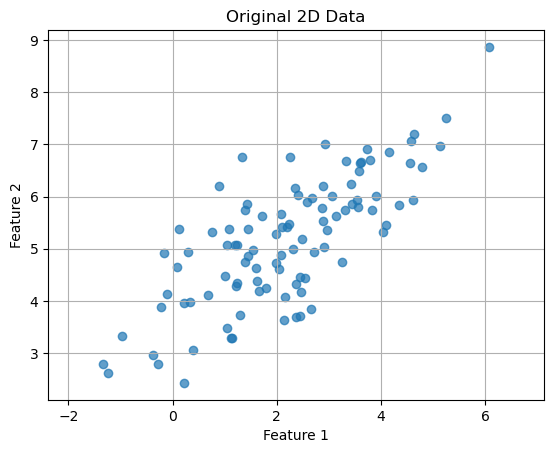

In [73]:
# Step 2: Plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

In [39]:
# Step 3: Center the data by subtracting the mean
X_centered = X - np.mean(X, axis=0)


In [41]:
# Step 4: Compute the covariance matrix
cov_matrix = np.cov(X_centered.T)


In [43]:
# Step 5: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


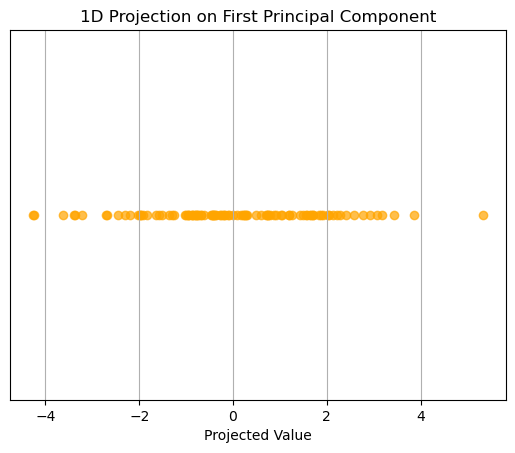

In [47]:
# Step 6: Plot the 1D projection
plt.scatter(X_projected, np.zeros_like(X_projected), alpha=0.7, color='orange')
plt.title("1D Projection on First Principal Component")
plt.xlabel("Projected Value")
plt.yticks([])
plt.grid(True)
plt.show()


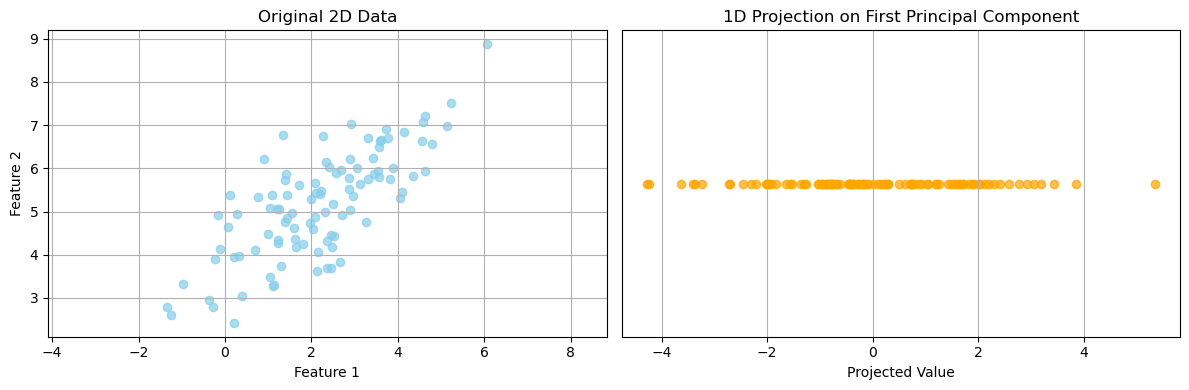

In [63]:
# Step 7: Plotting the 1D projection and comparing it with the original 2D projection
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot original 2D data
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color='skyblue')
axs[0].set_title("Original 2D Data")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")
axs[0].axis("equal")
axs[0].grid(True)

# Plot 1D projection on the first principal component
axs[1].scatter(X_projected, np.zeros_like(X_projected), alpha=0.7, color='orange')
axs[1].set_title("1D Projection on First Principal Component")
axs[1].set_xlabel("Projected Value")
axs[1].set_yticks([])
axs[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

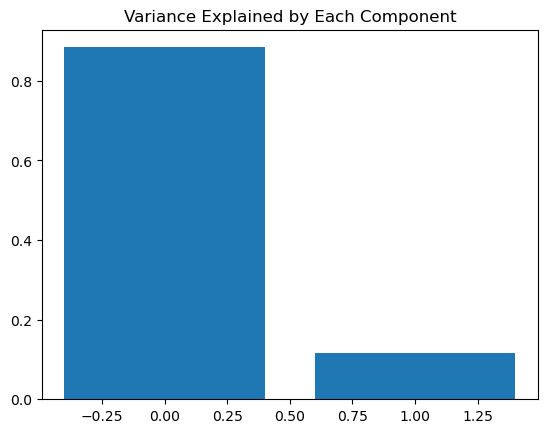

In [49]:
# Step 8: Plot the variance explained by each component
explained_variance = eigenvalues / np.sum(eigenvalues)
plt.bar(range(len(explained_variance)), explained_variance)
plt.title("Variance Explained by Each Component")
plt.show()


In [45]:
# Step 9: Project data onto the first principal component
first_pc = eigenvectors[:, 0]
X_projected = X_centered.dot(first_pc)


In [77]:
#part 2 start-
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Load dataset
digits = load_digits()
X = digits.data  # (1797, 64)
y = digits.target  # Labels: 0–9

# Inspect the shape of X and y
print("Shape of X,y:", X.shape)

# In the digits dataset 64 features represent the pixel width and length which is 8x8.
# After the x data gets flattened, each image becomes a vector of 64 values.


Shape of X,y: (1797, 64)


In [53]:
from sklearn.manifold import TSNE

# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X_digits)


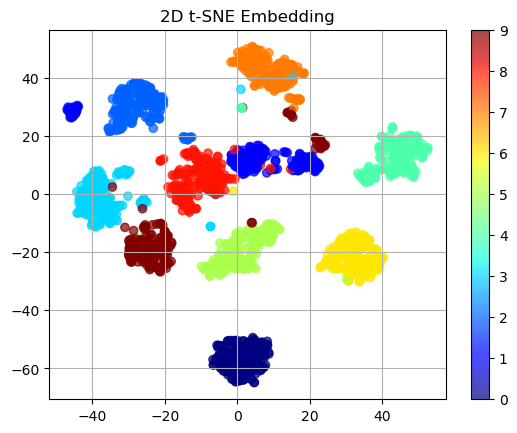

In [54]:
# Step 3: Visualize t-SNE in 2D
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_digits, cmap='jet', alpha=0.7)
plt.title("2D t-SNE Embedding")
plt.colorbar()
plt.grid(True)
plt.show()


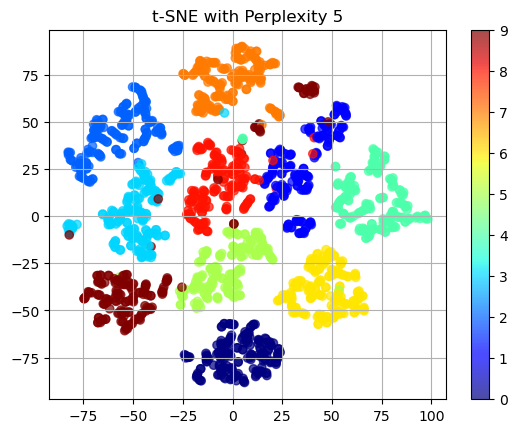

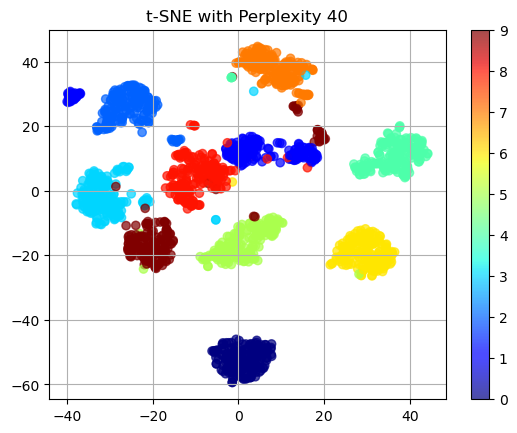

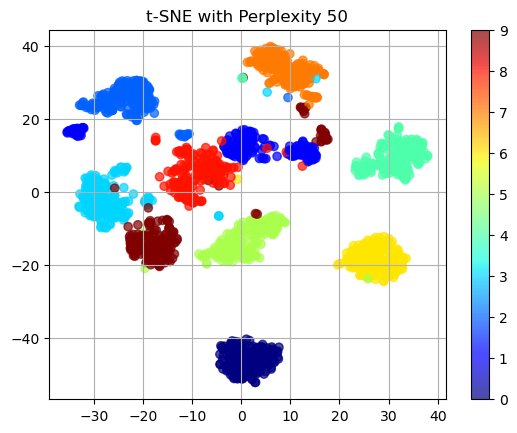

In [71]:
# Step 4: Experiment with different perplexity values
for perplexity in [5, 40, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_digits)
    
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_digits, cmap='jet', alpha=0.7)
    plt.title(f"t-SNE with Perplexity {perplexity}")
    plt.colorbar()
    plt.grid(True)
    plt.show()
